# <center>Introduction to Data Science</center> 
### <center>Neural Network Project 2</center>
### <center>Water Potability Classification</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Water is an essential part of any human being. Not all water accessible to humans are consumable. There are many factors that determine whether the water is safe for consumption. Many factors like the pH value and amount of different chemicals/minerals present in the water determines the potability of the water. Different region has different quality of water, and finding a right one can help yeild an economic benefit as well as health benefits. 

#### Objective
**Predicting whether the water quality is good for consumption based on different metrics of the water.**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Water Quality](https://www.kaggle.com/adityakadiwal/water-potability)

It has 10 fields and the description of each field of the dataset are: 
1. **pH value:** Evaluates the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO recommends a permissible limit of pH from 6.5 to 8.5. 

2. **Hardness:** Hardness defines the capacity of water to precipitate soap caused by Calcium and Magnesium. It is mainly caused by calcium and magnesium salts which are dissolved from geologic deposits. 

3. **Solids (Total dissolved solids - TDS):** It indicates the ability to dissolve a wide range of inorganic and some organic minerals or salts. These minerals produce unwanted taste and diluted color in appearance of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is between 500 mg/l and 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines:** Determines the amount of Chlorine and chloramine which are used as disinfectants in public water systems. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe for drinking water.

5. **Sulfate:** Indicates the amount of Sulfates in the water. They are naturally occurring substances that are found in minerals, soil, and rocks. 

6. **Conductivity:** Indicates the ionic conductivity of the water. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. Pure water is not a good conductor of electric current rather it is a good insulator. The amount of dissolved solids in water determines the electrical conductivity. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:** Total Organic Carbon (TOC) measures the total amount of carbon in organic compounds in pure water. It comes from decaying natural organic matter (NOM) as well as synthetic sources. 

8. **Trihalomethanes:** Trihalomethanes (THMs) are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:** It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU. It depends on the quantity of solid matter present in the suspended state. 

10. **Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Describing the size, shape and dimension of the dataset.
water_data = pd.read_csv('water_potability.csv') 
print("The total size of the dataset is {} bytes.".format(water_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(water_data.shape[0], water_data.shape[1], water_data.shape))
print("The dataset has a {} dimensional structure.".format(water_data.ndim))

The total size of the dataset is 32760 bytes.
There are 3276 number of records and 10 number of fields with a (3276, 10) shape.
The dataset has a 2 dimensional structure.


In [3]:
print("The top 5 records of the dataset are: \n{}".format(water_data.head()))

The top 5 records of the dataset are: 
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [4]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(water_data.dtypes))

The datatype of the dataset are: 
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [5]:
#Statistical description of the data
print(water_data.describe().T)

                  count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  

From the above statistics, we can see that there are certain values missing for ph, sulphate and trihalomethanes. 
The metrics min-max ranges widely from each other, thus scalability/normalization of the data is required. 
Few of the metrics looks to display skewness in the data. 

We will be removing all instances that has NaN values in it. 

In [6]:
#Deleting all the rows with NaN values
water_data = water_data.dropna()

print("Now, the number of rows has been reduced to {} rows and the new shape is {}".format(water_data.shape[0], water_data.shape))

print("The new data looks likes this: \n{}".format(water_data.describe().T))

Now, the number of rows has been reduced to 2011 rows and the new shape is (2011, 10)
The new data looks likes this: 
                  count          mean          std         min           25%  \
ph               2011.0      7.085990     1.573337    0.227499      6.089723   
Hardness         2011.0    195.968072    32.635085   73.492234    176.744938   
Solids           2011.0  21917.441374  8642.239815  320.942611  15615.665390   
Chloramines      2011.0      7.134338     1.584820    1.390871      6.138895   
Sulfate          2011.0    333.224672    41.205172  129.000000    307.632511   
Conductivity     2011.0    426.526409    80.712572  201.619737    366.680307   
Organic_carbon   2011.0     14.357709     3.324959    2.200000     12.124105   
Trihalomethanes  2011.0     66.400859    16.077109    8.577013     55.952664   
Turbidity        2011.0      3.969729     0.780346    1.450000      3.442915   
Potability       2011.0      0.403282     0.490678    0.000000      0.000000   

 

### Statistical Numerical and Graphical Summaries

In [7]:
print("Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. \n")

for data_keys in water_data.keys():
      skewness = water_data[data_keys].skew()
      if skewness > 0: 
          print(data_keys, "is Right Skewed")
      elif skewness <0:
          print(data_keys, "is Left Skewed")
      else:
          print(data_keys, "is Normally Distributed")

Below is the list of all the keys of the dataset and determines whether they are normally distributed or skewed. 

ph is Right Skewed
Hardness is Left Skewed
Solids is Right Skewed
Chloramines is Right Skewed
Sulfate is Left Skewed
Conductivity is Right Skewed
Organic_carbon is Left Skewed
Trihalomethanes is Left Skewed
Turbidity is Left Skewed
Potability is Right Skewed


We can further modify the graph using the pairplot to determine what data fall under Potable or Not Potable


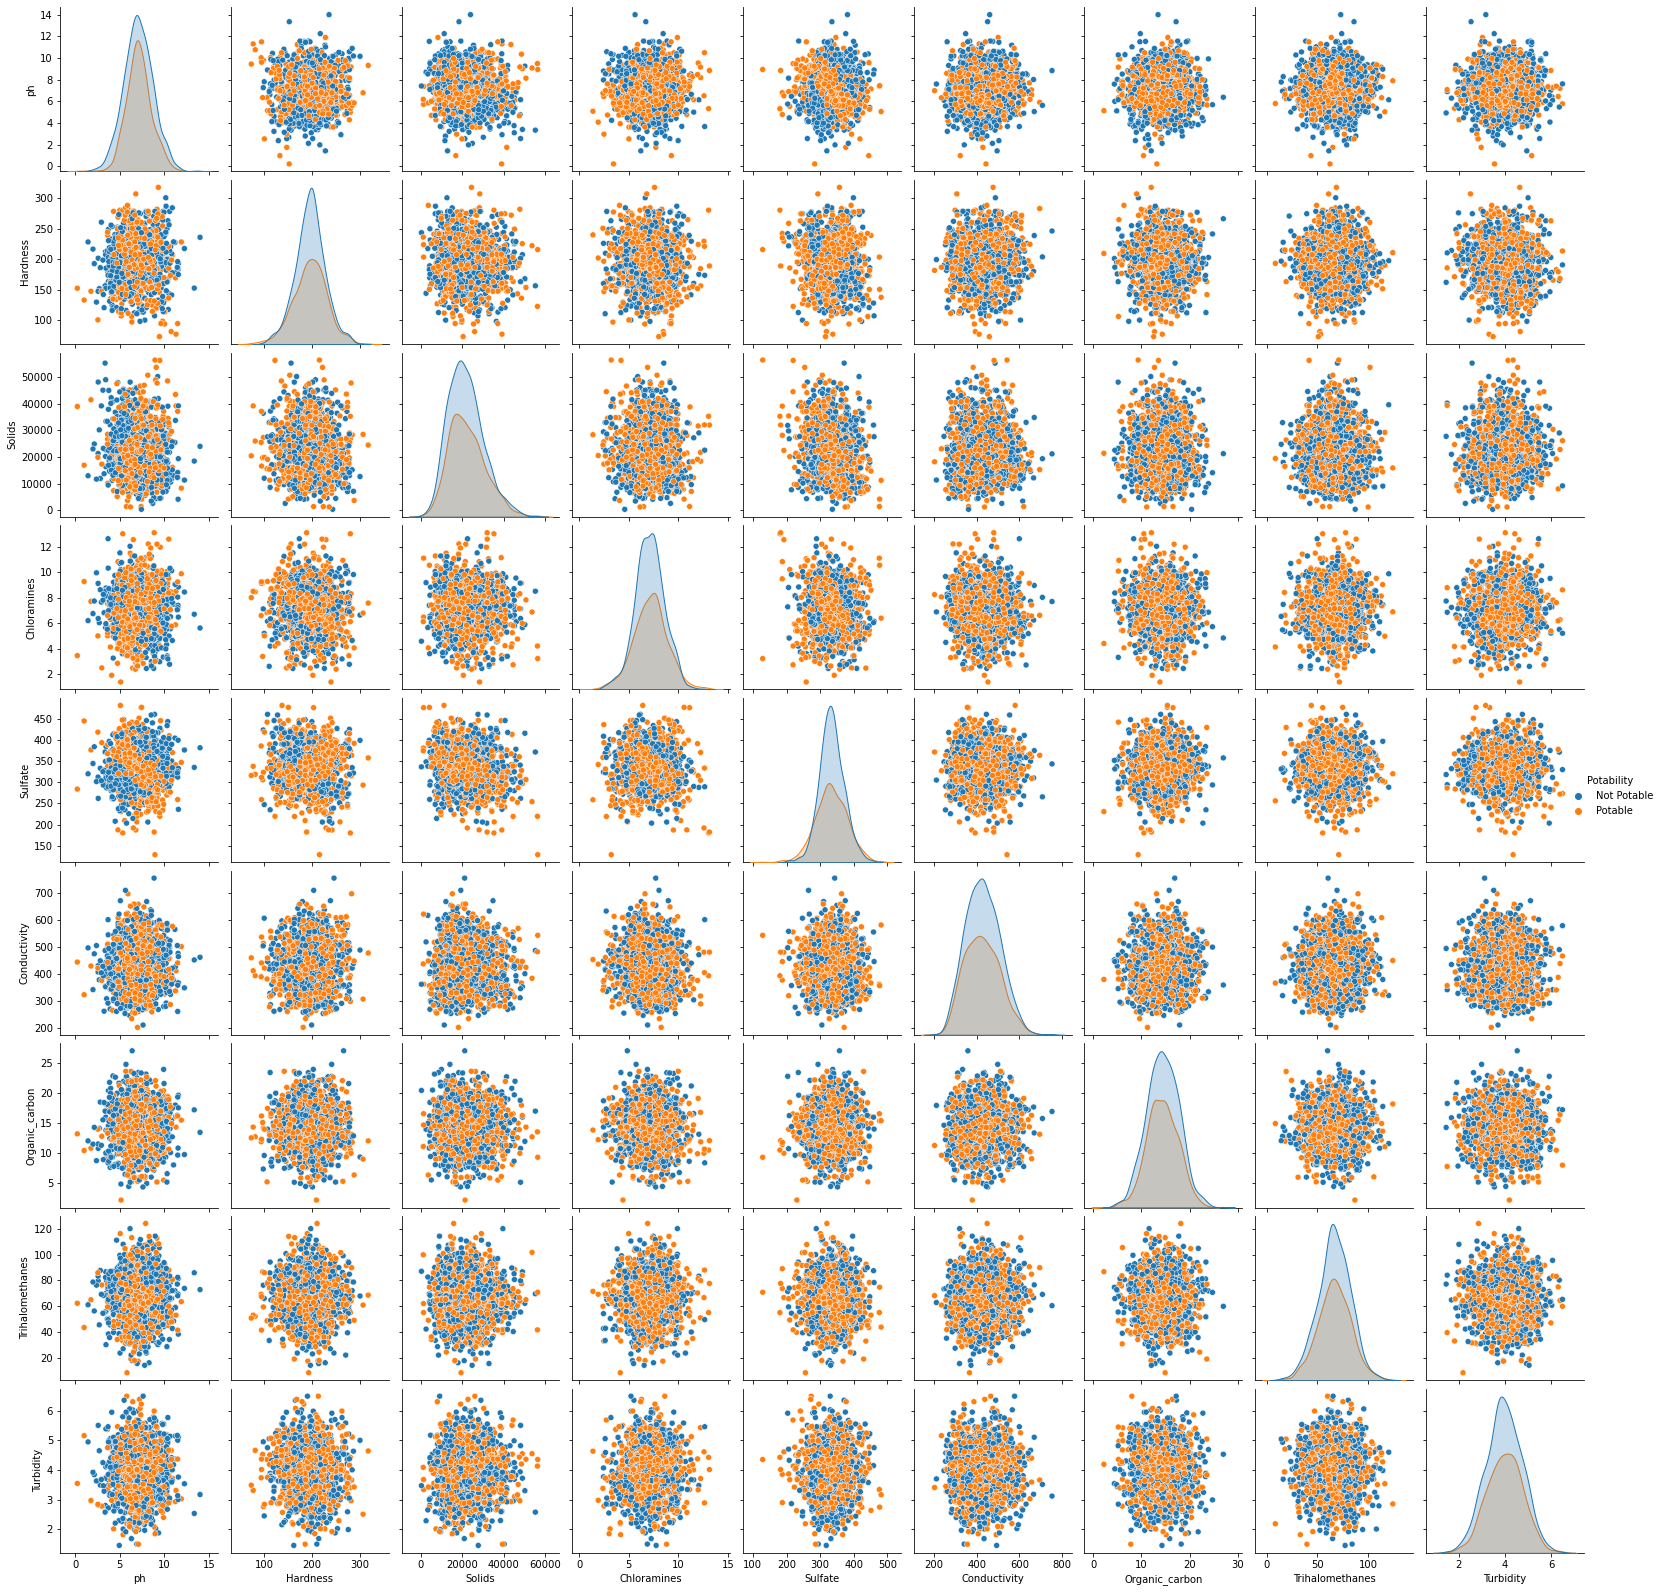

In [8]:
#plotting pairplot to see how the data are scattered based on the target variable
print("We can further modify the graph using the pairplot to determine what data fall under Potable or Not Potable")

_sns_pairplot_data = sns.pairplot(water_data, hue='Potability')

#Updating the legend label for ease. 
new_labels = ['Not Potable', 'Potable']
for t, l in zip(_sns_pairplot_data._legend.texts, new_labels): 
    t.set_text(l)

In the graph above, the blue dots/area denotes the water quality as "Not Potable" where as orange marks the quality as "Potable". 
We can see there are outliers present in the graphs. <br/>
Looking at the graph, we can identify hardness, solids, chloramines, sulfate, conductivity and turbidity metrics might be sufficed to determine the quality of the water. <br/>
However, it is quite difficult to say which metrics factors more as we can see that both the type of water are dispersed evenly in the scatter plot. 
We can also see that the data is underfitting as orange dots (Potable) outcomes can be seen dominating the blue dots (Not Potable).

### Algorithm Implementation and Statistical Tests 

In [47]:
#Selecting all the features for the inital algorithm test.
X = water_data.iloc[:, 0:9]
y = water_data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Using MinMaxNormalization to normalize the dataset in the range of 0 to 1.
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Testing with different hyperparameters.

In [35]:
#Creating 2 hidden layer with 9 units on each as we have 9 features. 
#Using "lbfgs" solver. 
classifier = MLPClassifier(hidden_layer_sizes=(9,9), 
                           max_iter=1500, solver="lbfgs", early_stopping=True, random_state=1)
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 0 number of training samples during the fitting phase and ran for 414 iterations. The solver has 4 layers and 1 number of output(s). The accuracy score is 0.6341948310139165
Confusion Matrix:
      F   T
F  275  35
T  149  44
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       310
           1       0.56      0.23      0.32       193

    accuracy                           0.63       503
   macro avg       0.60      0.56      0.54       503
weighted avg       0.61      0.63      0.59       503



In [37]:
#Creating 3 hidden layer with 9 units on each as we have 9 features. Using "lbfgs" as a solver
classifier = MLPClassifier(hidden_layer_sizes=(9,9,9), 
                           max_iter=1000, solver="lbfgs")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 0 number of training samples during the fitting phase and ran for 1000 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.610337972166998
Confusion Matrix:
      F   T
F  277  33
T  163  30
              precision    recall  f1-score   support

           0       0.63      0.89      0.74       310
           1       0.48      0.16      0.23       193

    accuracy                           0.61       503
   macro avg       0.55      0.52      0.49       503
weighted avg       0.57      0.61      0.55       503



In [38]:
#Creating 2 hidden layer with 9 units on each as we have 9 features. 
#Using "sgd" as a solver and invscaling as the learning rate for the algorithm. 
classifier = MLPClassifier(hidden_layer_sizes=(9,9), 
                           max_iter=500, solver="sgd", learning_rate="invscaling")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 21112 number of training samples during the fitting phase and ran for 14 iterations. The solver has 4 layers and 1 number of output(s). The accuracy score is 0.6163021868787276
Confusion Matrix:
      F  T
F  310  0
T  193  0
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       310
           1       0.00      0.00      0.00       193

    accuracy                           0.62       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.38      0.62      0.47       503



In [39]:
#Creating 4 hidden layer with 9 units on each as we have 9 features. 
#Using "sgd" as a solver and invscaling as the learning rate for the algorithm. 
classifier = MLPClassifier(hidden_layer_sizes=(9,9,9,9), 
                           max_iter=1000, solver="sgd", learning_rate="adaptive")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 101036 number of training samples during the fitting phase and ran for 67 iterations. The solver has 6 layers and 1 number of output(s). The accuracy score is 0.6163021868787276
Confusion Matrix:
      F  T
F  310  0
T  193  0
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       310
           1       0.00      0.00      0.00       193

    accuracy                           0.62       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.38      0.62      0.47       503



In [40]:
#Creating 2 hidden layer with 9 units on each as we have 9 features. 
#Using "adam" as a solver.
classifier = MLPClassifier(hidden_layer_sizes=(9,9), 
                           max_iter=1000, early_stopping=True)
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 16284 number of training samples during the fitting phase and ran for 12 iterations. The solver has 4 layers and 1 number of output(s). The accuracy score is 0.6163021868787276
Confusion Matrix:
      F  T
F  310  0
T  193  0
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       310
           1       0.00      0.00      0.00       193

    accuracy                           0.62       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.38      0.62      0.47       503



From all the different hyperparameters, we can see that MLPClassifier with hidden layer with size of (9,9) and max iteration of 1500 using lbfgs as a solver has a higher accuracy than the rest. 
We can see better seperability with this configuration too. 

As of now, we have used all of the features available to us. Using of few selected best feature might give us better result. Thus, using the SelectKBest and chi2 to find the top features that contribute in predicting the output. 

### Performance Improvement

In [15]:
#Finding the best features that contribute in the prediction
X = water_data.iloc[:, 0:9]
y = water_data.iloc[:, -1]

select_k_best = SelectKBest(score_func=chi2, k=5)

best_result = select_k_best.fit(X, y)

scores = pd.DataFrame(best_result.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Field', 'Score']

print(feature_scores.nlargest(10, 'Score'))

             Field         Score
2           Solids  11331.737149
5     Conductivity      7.371505
4          Sulfate      2.398413
7  Trihalomethanes      0.668603
6   Organic_carbon      0.375055
3      Chloramines      0.305664
8        Turbidity      0.158631
0               ph      0.148242
1         Hardness      0.024744


From the above list we can see that SOLIDS, CONDUCTIVITY and SULFATE looks to be the major features, however, Solids field has contributed highly to predict whether a patient needs inpatient or outpatient care. We will choose these three fields as they have score greater than 1. 

In [53]:
#Using the top three featuers to predict the Potability of the water.
X = water_data[['Solids', 'Conductivity', 'Sulfate']]
Y = water_data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X, Y)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=1500, solver="lbfgs")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
print(classification_report(y_test,np.ravel(y_pred)))
testing_score = cross_val_score(classifier, X_test, np.ravel(y_test), cv=kfold)
print("Testing score for the Neural Network algorithm with the crossvalidation is {} %".format(testing_score.mean()*100))

The solver saw 0 number of training samples during the fitting phase and ran for 4 iterations. The solver has 4 layers and 1 number of output(s). The accuracy score is 0.614314115308151
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       309
           1       0.00      0.00      0.00       194

    accuracy                           0.61       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.38      0.61      0.47       503

Testing score for the Neural Network algorithm with the crossvalidation is 60.84313725490196 %


We can find out the best values of hyperparameters that can be used for the current dataset using the GridSearchCV. We are defining the different hyperparameters and passing to the GridSearchCV to find the optimal hyperparameters.

In [17]:
#Listing all the hyperparameters that is to be tested for the algorithm to find the optimal hyperparameter values.
solver = ["sgd", "adam", "lbfgs"]
activation = ["identity", "logistic", "tanh", "relu"]
max_iter = [100, 500, 800, 1000, 2000]
hidden_layer_sizes=[(2,2), (3,3), (2,2,2), (3,3,3), (9,9,9)]
param_grid = dict(solver=solver, activation=activation, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)

classifier = MLPClassifier()

grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)
grid_result = grid.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.597714 using {'activation': 'tanh', 'hidden_layer_sizes': (3, 3, 3), 'max_iter': 500, 'solver': 'sgd'}
0.596719 (0.000887) with: {'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'max_iter': 100, 'solver': 'sgd'}
0.495271 (0.069726) with: {'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'max_iter': 100, 'solver': 'adam'}
0.537609 (0.087599) with: {'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'max_iter': 100, 'solver': 'lbfgs'}
0.596719 (0.000887) with: {'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'max_iter': 500, 'solver': 'sgd'}
0.496296 (0.085718) with: {'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'max_iter': 500, 'solver': 'adam'}
0.577814 (0.058305) with: {'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'max_iter': 500, 'solver': 'lbfgs'}
0.596719 (0.000887) with: {'activation': 'identity', 'hidden_layer_sizes': (2, 2), 'max_iter': 800, 'solver': 'sgd'}
0.544978 (0.068908) with: {'activation': 'identity', 'hidden_lay

From the above, we can see that the best solution can be obtained from the below hyperparameters: 
* activation: tanh
* max_iter: 500
* solver: 'sgd'
* hidden_layer_sizes: (3,3,3)

The accuracy score is: 0.5977
This accuracy score is slightly lower than what we achieved in the previous section, however this is the accuracy score for the selected features.

Now, running the algorithm using the selected features and the optimal hyperparameters. 

In [52]:
#Using the above optimal hyperparameter suggestion with the features and predicting.
X = water_data[['Solids', 'Conductivity', 'Sulfate']]
Y = water_data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X, Y)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = MLPClassifier(hidden_layer_sizes=(3,3,3), activation="tanh", max_iter=500, solver="sgd", random_state=1)
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
print(classification_report(y_test,np.ravel(y_pred)))
testing_score = cross_val_score(classifier, X_test, np.ravel(y_test), cv=kfold)
print("Testing score for the Neural Network algorithm with the crossvalidation is {} %".format(testing_score.mean()*100))

The solver saw 58812 number of training samples during the fitting phase and ran for 39 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.614314115308151
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       309
           1       0.00      0.00      0.00       194

    accuracy                           0.61       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.38      0.61      0.47       503

Testing score for the Neural Network algorithm with the crossvalidation is 61.40000000000001 %


In [51]:
#Running the 10 fold cross validation 
y_pred = classifier.predict(X_test)
kfold = KFold(n_splits=10, shuffle=True)
training_score = cross_val_score(classifier, X_train,np.ravel(y_train), cv=kfold)
print("The training score for the Neural Network algorithm with the crossvalidation: {} %".format(training_score.mean()*100))
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

#Creating confusion matrix and classification report on the prediction.
print(classification_report(y_test,np.ravel(y_pred)))
testing_score = cross_val_score(classifier, X_test, np.ravel(y_test), cv=kfold)
print("Testing score for the Neural Network algorithm with the crossvalidation is {} %".format(testing_score.mean()*100))

The training score for the Neural Network algorithm with the crossvalidation: 58.74922737306842 %
Confusion Matrix:
      F  T
F  314  0
T  189  0
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       314
           1       0.00      0.00      0.00       189

    accuracy                           0.62       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.39      0.62      0.48       503

Testing score for the Neural Network algorithm with the crossvalidation is 62.45098039215687 %


From the above confusion matrix, we can see that either the observation is marked as true negative or false negative. The algorithm does not look to be predicting accurately. 
The sensitivity is 1 for the Not Potability that means the prediction for Not Potability is good whereas the sensitivity for predicting Potability of the water is 0. 

In [50]:
#Using the above optimal hyperparameter suggestion with all of the features and predicting.
X = water_data.iloc[:, 0:9]
Y = water_data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X, Y)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = MLPClassifier(hidden_layer_sizes=(3,3,3), activation="tanh", max_iter=500, solver="sgd", random_state=1)
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
print(classification_report(y_test,np.ravel(y_pred)))
testing_score = cross_val_score(classifier, X_test, np.ravel(y_test), cv=kfold)
print("Testing score for the Neural Network algorithm with the crossvalidation is {} %".format(testing_score.mean()*100))

The solver saw 40716 number of training samples during the fitting phase and ran for 27 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.6242544731610338
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       314
           1       0.00      0.00      0.00       189

    accuracy                           0.62       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.39      0.62      0.48       503

Testing score for the Neural Network algorithm with the crossvalidation is 62.435294117647054 %


### Conclusion

Thus, from the above implementation of the neural network we can conclude that high accuracy is not able to obtain. Prediction accuracy of about 59% in average is obtained with different hyperparameters and we can see that the confusion matrix is not well seperated. The accuracy of the algorithm is lower than the other algorithm such as decision tree and k-nn algorithm and the seperatibility is lower in neural network too. 

| K-NN | Decision Tree | Neural Network |
|--|--|--|
|72%|65%|59%|

Looking at the table above we can see that K-NN provides better accuracy for this dataset.

To get better results the approach with all the feature used and MLPClassifier with hidden layer with size of (9,9) and max iteration of 1500 using lbfgs as a solver has a higher accuracy than the rest. 